In [1]:
import numpy as np
import pandas as pd

from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn import svm
from itertools import cycle

### 1) Сгенерируем 2 линейно разделимых класса

In [2]:
n_samples = 1000
centers = [(-3, -3), (3, 3)]

X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=42)

### 2) Применим линейный SVM и визуализируем разделяющую гиперплоскость

In [3]:
clf = svm.SVC(kernel='linear', C=1000)

In [4]:
clf.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [5]:
def plot_decision_boundary(model, X, y):
    # get the separating hyperplane
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-6, 6)
    yy = a * xx - (model.intercept_[0]) / w[1]
    
    margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    n_clusters = 2
    plt.figure(1, figsize=(10, 10))
    for cluster, color in zip(range(n_clusters), ["b", "g"]):
        flag = y == cluster
        plt.plot(X[flag, 0], X[flag, 1], color + '.')

    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.show()

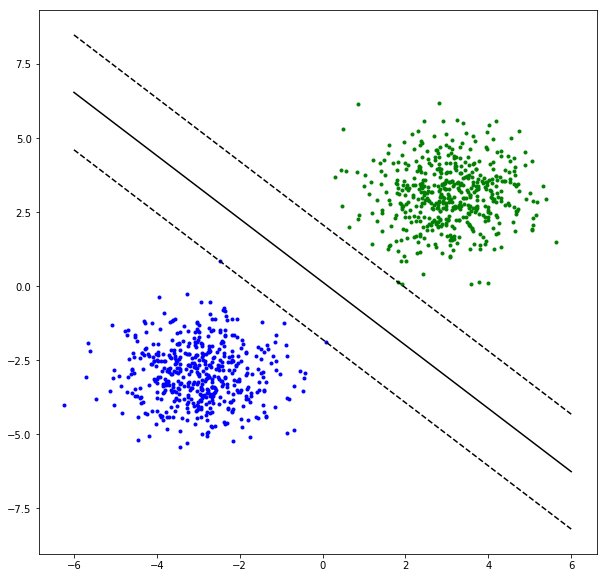

In [6]:
plot_decision_boundary(clf, X, y)

### 3) Cгенерируем линейно неразделимую выборку

In [7]:
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=17)
X *= 6

### 4) Применим линейный SVM к этой выборке 

In [8]:
clf.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

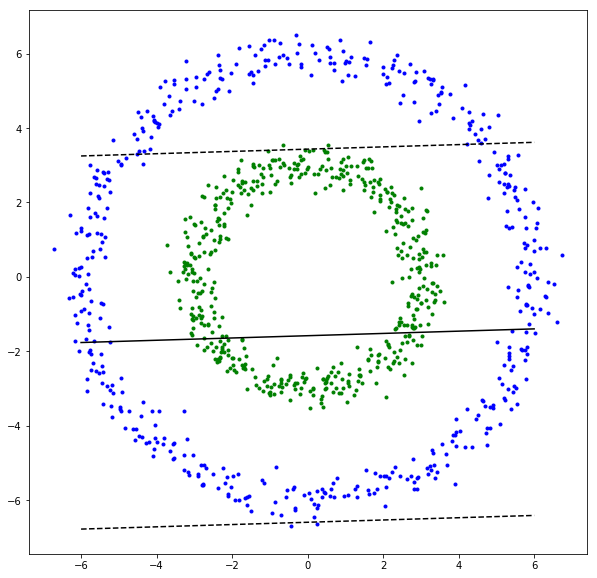

In [9]:
plot_decision_boundary(clf, X, y)

Линейный SVM не подходит для этой задачи.

### 5) Построим разделяющую поверхность при помощи SVM с двумя разными нелинейными ядрами

In [10]:
C = 1.0
models = [svm.SVC(kernel='rbf', gamma=0.7, C=C), svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)]

In [11]:
models = [clf.fit(X, y) for clf in models]

### 6) Визуализируем результат

In [12]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

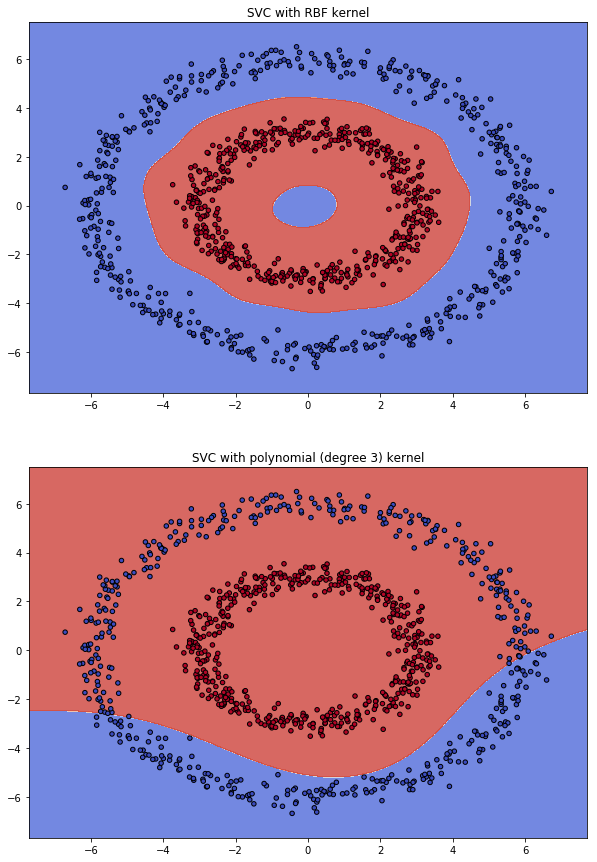

In [13]:
fig, sub = plt.subplots(2, 1, figsize=(10, 15))

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

titles = ['SVC with RBF kernel', 'SVC with polynomial (degree 3) kernel']

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

plt.show()

SVM c RBF ядром отлично справился с этой задачей, у SVM c ядром в виде полинома 3 степени точность лучше чем у линейного SVM, но хуже чем у RBF ядра.